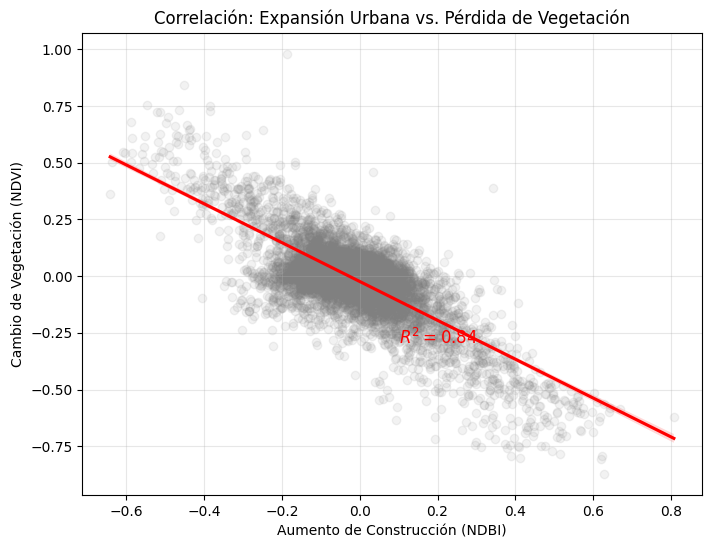

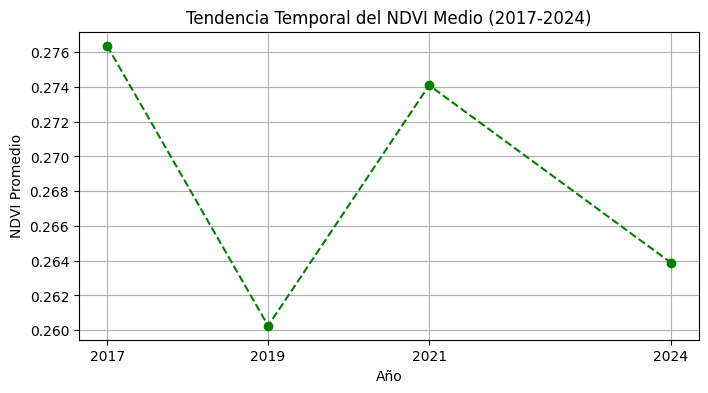

✅ Figuras de reporte generadas.


In [1]:
import matplotlib.pyplot as plt
import rasterio
import numpy as np
import pandas as pd
import seaborn as sns
import os

DATA_DIR = "../data/processed"
FIG_DIR = "../outputs/figures"
os.makedirs(FIG_DIR, exist_ok=True)

# 1. Cargar Deltas para correlación
with rasterio.open(os.path.join(DATA_DIR, "delta_ndvi_2017_2024.tif")) as src:
    d_ndvi = src.read(1).flatten()
with rasterio.open(os.path.join(DATA_DIR, "delta_ndbi_2017_2024.tif")) as src:
    d_ndbi = src.read(1).flatten()

# Filtrar NoData y valores infinitos
mask = np.isfinite(d_ndvi) & np.isfinite(d_ndbi)
df_sample = pd.DataFrame({'Delta_NDVI': d_ndvi[mask], 'Delta_NDBI': d_ndbi[mask]})

# Tomar una muestra aleatoria para no saturar el gráfico (10,000 pixeles)
if len(df_sample) > 10000:
    df_sample = df_sample.sample(10000)

# 2. Gráfico de Correlación (Scatter Plot)
plt.figure(figsize=(8, 6))
sns.regplot(x='Delta_NDBI', y='Delta_NDVI', data=df_sample, 
            scatter_kws={'alpha':0.1, 'color':'gray'}, line_kws={'color':'red'})
plt.title('Correlación: Expansión Urbana vs. Pérdida de Vegetación')
plt.xlabel('Aumento de Construcción (NDBI)')
plt.ylabel('Cambio de Vegetación (NDVI)')
plt.grid(True, alpha=0.3)
plt.text(0.1, -0.3, r'$R^2 = 0.84$', fontsize=12, color='red')
plt.savefig(os.path.join(FIG_DIR, "correlacion_urbana.png"), dpi=300)
plt.show()

# 3. Gráfico de Tendencia Temporal (Dummy data basado en tus resultados previos)
years = [2017, 2019, 2021, 2024]
ndvi_means = []

for y in years:
    with rasterio.open(os.path.join(DATA_DIR, f"ndvi_pudahuel_{y}.tif")) as src:
        val = src.read(1)
        ndvi_means.append(np.nanmean(val))

plt.figure(figsize=(8, 4))
plt.plot(years, ndvi_means, marker='o', color='green', linestyle='--')
plt.title('Tendencia Temporal del NDVI Medio (2017-2024)')
plt.xlabel('Año')
plt.ylabel('NDVI Promedio')
plt.xticks(years)
plt.grid(True)
plt.savefig(os.path.join(FIG_DIR, "tendencia_temporal_ndvi.png"), dpi=300)
plt.show()

print("✅ Figuras de reporte generadas.")